In [1]:
from PIL import Image
import requests
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import torch
from torch import nn
from torchvision.models import resnet50
import torchvision.transforms as T
torch.set_grad_enabled(False);

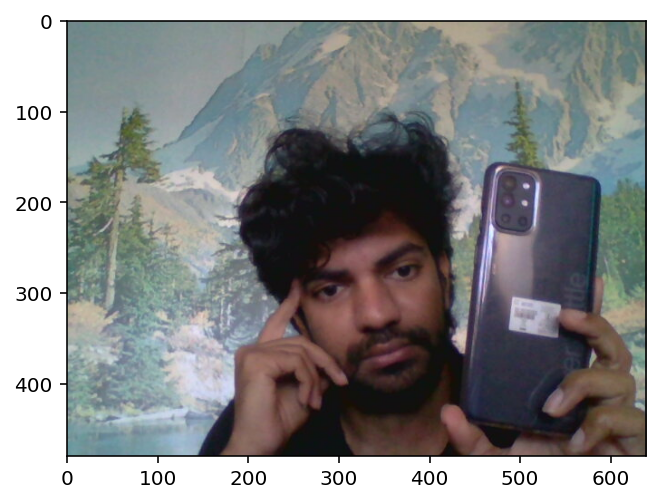

In [2]:
import cv2
import matplotlib.pyplot as plt
from torchvision import transforms   
from torchvision.models import resnet50

img = cv2.imread("img1.jpg")
trans = transforms.Compose([transforms.ToTensor(),transforms.Resize((480, 480))])
img_resize = trans(img)
channels, height, width = img_resize.shape
img_show = img_resize.permute(1,2,0).numpy()
img_show = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.imshow(img_resize.permute(1,2,0).numpy())
plt.imshow(img_show)

In [3]:
backbone = resnet50()
# del backbone.fc

In [7]:
# backbone.avgpool
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

backbone.layer4.register_forward_hook(get_activation('layer4'))
output = backbone(img_resize.unsqueeze(dim=0))
extractor = activation['layer4']

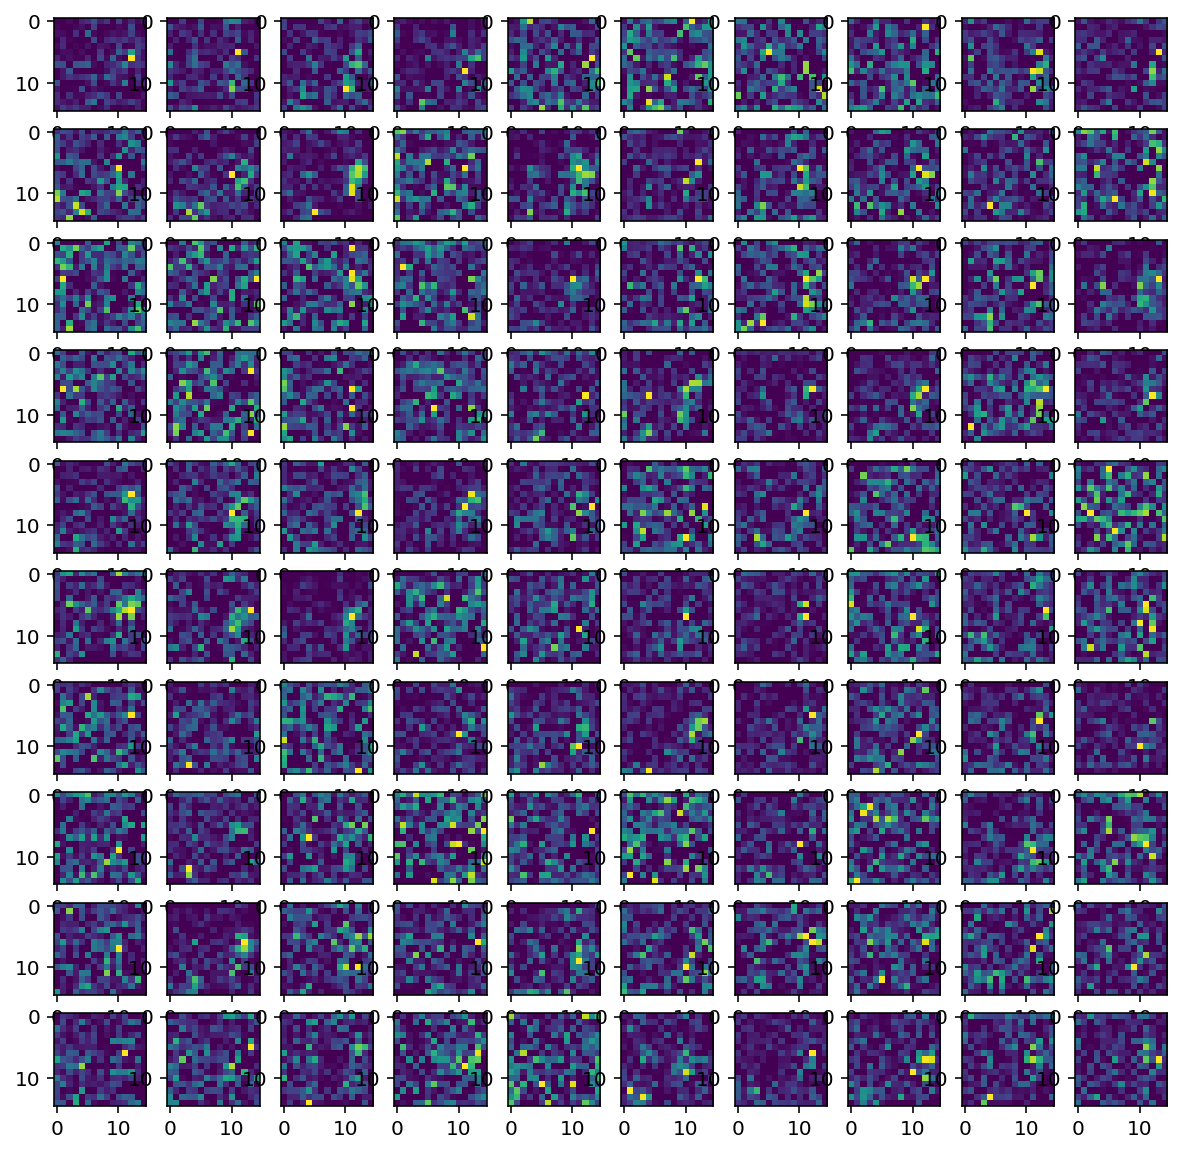

In [24]:
# extractor.shape
plt.figure(figsize=(10,10)) # specifying the overall grid size
for i in range(100):
    # arr = out[i].reshape(int(patch.n_patches**0.5), int(patch.n_patches**0.5),1)
    plt.subplot(10,10,i+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(extractor.squeeze()[i])
plt.show()

In [32]:
hidden_dim = 256
conv = nn.Conv2d(2048, hidden_dim, 1)
out = conv(extractor)


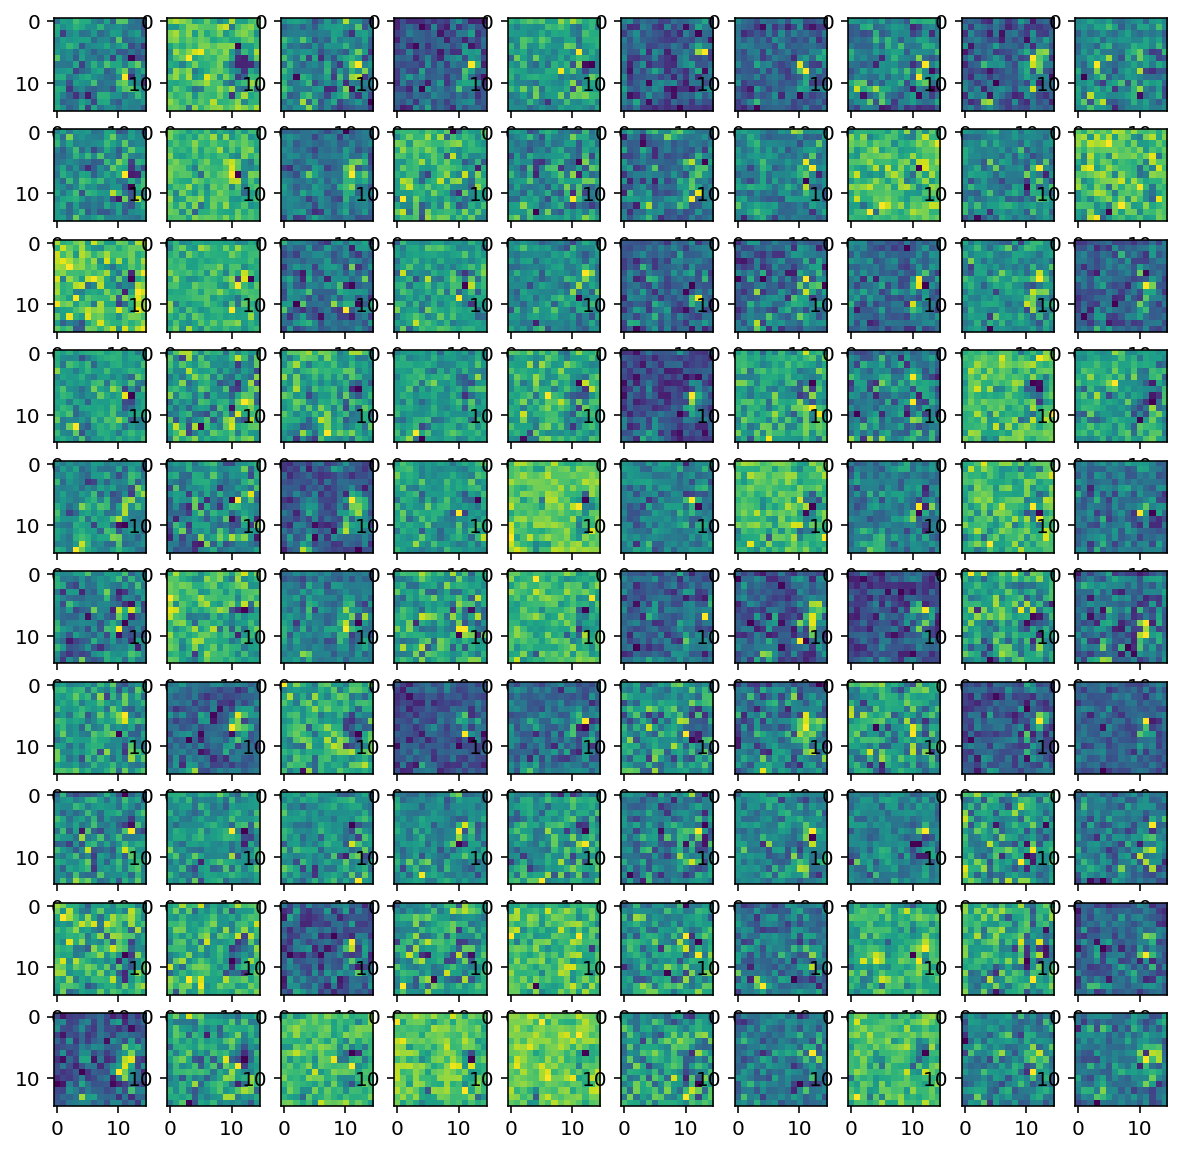

In [34]:
plt.figure(figsize=(10,10)) # specifying the overall grid size
for i in range(100):
    # arr = out[i].reshape(int(patch.n_patches**0.5), int(patch.n_patches**0.5),1)
    plt.subplot(10,10,i+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(out.squeeze()[i])
plt.show()

#### Positional Encoder

In [42]:
# spatial positional encodings
# note that in baseline DETR we use sine positional encodings
row_embed = nn.Parameter(torch.rand(50, hidden_dim // 2))
col_embed = nn.Parameter(torch.rand(50, hidden_dim // 2))

In [ ]:
# construct positional encodings
H, W = out.shape[-2:]
pos = torch.cat([
    col_embed[:W].unsqueeze(0).repeat(H, 1, 1),
    row_embed[:H].unsqueeze(1).repeat(1, W, 1),
], dim=-1).flatten(0, 1).unsqueeze(1)

In [43]:
row_embed.shape

torch.Size([50, 128])

In [44]:
col_embed.shape

torch.Size([50, 128])

In [46]:
pos.shape

torch.Size([225, 1, 256])